# Assignment-Clustering (Ankit, ankit9@powergrid.in)

### Data loading, understanding and preparation

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from numpy import nan

In [2]:
# Loading and reading data
power_df = pd.read_table('household_power_consumption.txt',sep=';',infer_datetime_format=True,\
                         parse_dates={'datetime':[0,1]},index_col=0,na_values='?', low_memory = False)
power_df.head()

Global_active_power  Global_reactive_power  Voltage  \
datetime                                                                   
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
datetime                                                                
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28:00              15.8             0.0             1.0   

                     Sub_metering_3  
datetime                             
2006-12-16 17:24:00            17.0  
2006-12-16 17:25:00            16.0  
2006-12-16 17:26:00            17.0  
2006-12-16 17:27:00            17.0  
2006-12-16 17:28:00            17.0

In [3]:
#convert Global active power and Global reactive power to watts from KWH
power_df['Global_reactive_power'] = power_df['Global_reactive_power']*(1000/60)
power_df['Global_active_power'] = power_df['Global_active_power']*(1000/60)

In [4]:
# Checking number of rows and columns in dataframe
print(power_df.shape)
print("------------------------------------------")
# Checking for count of Non-Null data for missing values
print(power_df.info(show_counts=True))

(2075259, 7)
------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Global_active_power    2049280 non-null  float64
 1   Global_reactive_power  2049280 non-null  float64
 2   Voltage                2049280 non-null  float64
 3   Global_intensity       2049280 non-null  float64
 4   Sub_metering_1         2049280 non-null  float64
 5   Sub_metering_2         2049280 non-null  float64
 6   Sub_metering_3         2049280 non-null  float64
dtypes: float64(7)
memory usage: 126.7 MB
None


In [5]:
# Check for missing values
power_df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [6]:
# Drop rows with Null data
power_df = power_df.dropna()
print(power_df.info(show_counts=True))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2049280 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Global_active_power    2049280 non-null  float64
 1   Global_reactive_power  2049280 non-null  float64
 2   Voltage                2049280 non-null  float64
 3   Global_intensity       2049280 non-null  float64
 4   Sub_metering_1         2049280 non-null  float64
 5   Sub_metering_2         2049280 non-null  float64
 6   Sub_metering_3         2049280 non-null  float64
dtypes: float64(7)
memory usage: 125.1 MB
None


In [7]:
# Adding Active Energy Consumed column in dataframe 
power_df["Active_Energy_Consumed"] = power_df["Global_active_power"] - (\
                                                                        power_df["Sub_metering_1"] + \
                                                                        power_df["Sub_metering_2"] + \
                                                                        power_df["Sub_metering_3"])

In [8]:
# univariate analysis
print(power_df.describe())

       Global_active_power  Global_reactive_power       Voltage  \
count         2.049280e+06           2.049280e+06  2.049280e+06   
mean          1.819358e+01           2.061908e+00  2.408399e+02   
std           1.762157e+01           1.878700e+00  3.239987e+00   
min           1.266667e+00           0.000000e+00  2.232000e+02   
25%           5.133333e+00           8.000000e-01  2.389900e+02   
50%           1.003333e+01           1.666667e+00  2.410100e+02   
75%           2.546667e+01           3.233333e+00  2.428900e+02   
max           1.853667e+02           2.316667e+01  2.541500e+02   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
count      2.049280e+06    2.049280e+06    2.049280e+06    2.049280e+06   
mean       4.627759e+00    1.121923e+00    1.298520e+00    6.458447e+00   
std        4.444396e+00    6.153031e+00    5.822026e+00    8.437154e+00   
min        2.000000e-01    0.000000e+00    0.000000e+00    0.000000e+00   
25%        1.400000e+

In [9]:
# Resampling data to 'Hourly' sum
power_resample_df = power_df.resample('H').sum()
power_resample_df.head()

Global_active_power  Global_reactive_power   Voltage  \
datetime                                                                    
2006-12-16 17:00:00          2533.733333             137.400000   8447.18   
2006-12-16 18:00:00          3632.200000              80.033333  14074.81   
2006-12-16 19:00:00          3400.233333              85.233333  13993.95   
2006-12-16 20:00:00          3268.566667              75.100000  14044.29   
2006-12-16 21:00:00          3056.466667              76.666667  14229.52   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
datetime                                                                
2006-12-16 17:00:00             651.6             0.0            19.0   
2006-12-16 18:00:00             936.0             0.0           403.0   
2006-12-16 19:00:00             870.2             0.0            86.0   
2006-12-16 20:00:00             835.0             0.0             0.0   
2006-12-16 21:00:00             782.8             0.0            25.0   

                     Sub_metering_3  Active_Energy_Consumed  
datetime                                                     
2006-12-16 17:00:00           607.0             1907.733333  
2006-12-16 18:00:00          1012.0             2217.200000  
2006-12-16 19:00:00          1001.0             2313.233333  
2006-12-16 20:00:00          1007.0             2261.566667  
2006-12-16 21:00:00          1033.0             1998.466667

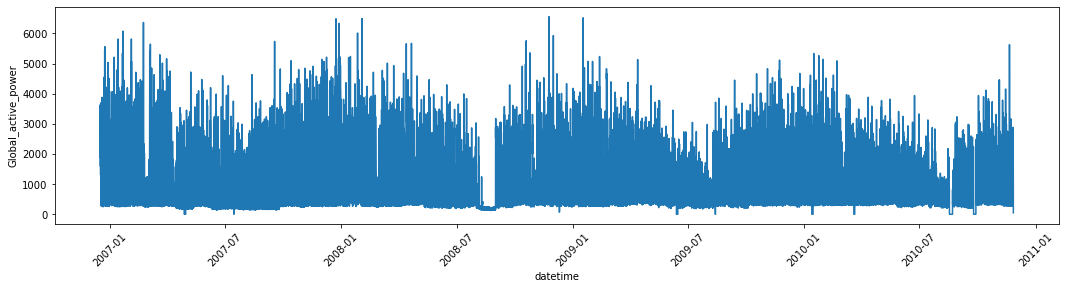

In [10]:
# Time Series Plot for global active power
plt.figure(figsize=(18,4))
sns.lineplot(data=power_resample_df['Global_active_power'])
plt.xticks(rotation=45)
plt.show()

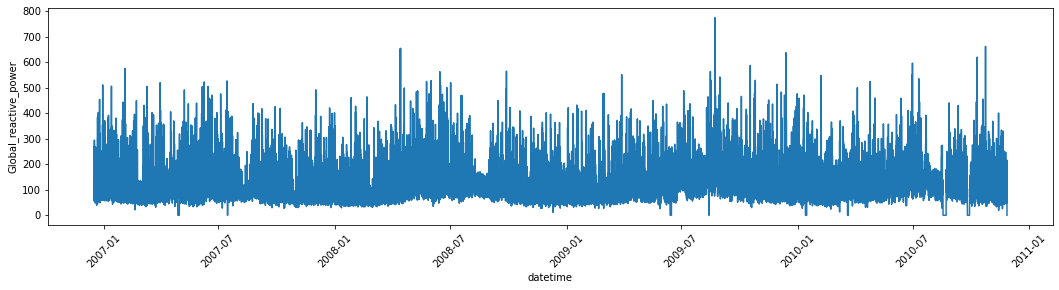

In [11]:
# Time Series Plot for global reactive power
plt.figure(figsize=(18,4))
sns.lineplot(data=power_resample_df['Global_reactive_power'])
plt.xticks(rotation=45)
plt.show()

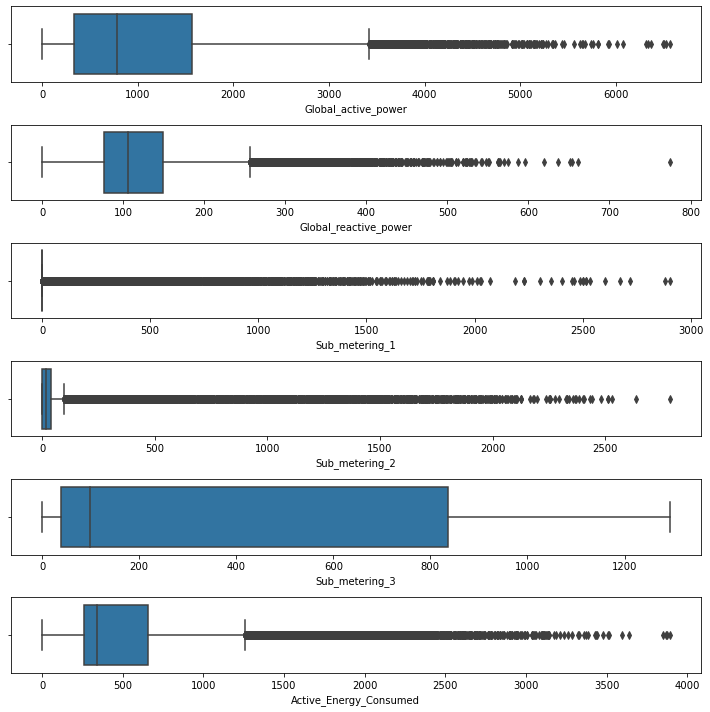

In [12]:
# Box plots for Outlier Analysis
fig, axs = plt.subplots(6,1, figsize = (10,10))
plt1 = sns.boxplot(data=power_resample_df, x='Global_active_power', ax = axs[0])
plt2 = sns.boxplot(data=power_resample_df, x='Global_reactive_power', ax = axs[1])
plt3 = sns.boxplot(data=power_resample_df, x='Sub_metering_1', ax = axs[2])
plt4 = sns.boxplot(data=power_resample_df, x='Sub_metering_2', ax = axs[3])
plt5 = sns.boxplot(data=power_resample_df, x='Sub_metering_3', ax = axs[4])
plt6 = sns.boxplot(data=power_resample_df, x='Active_Energy_Consumed', ax = axs[5])
plt.tight_layout()

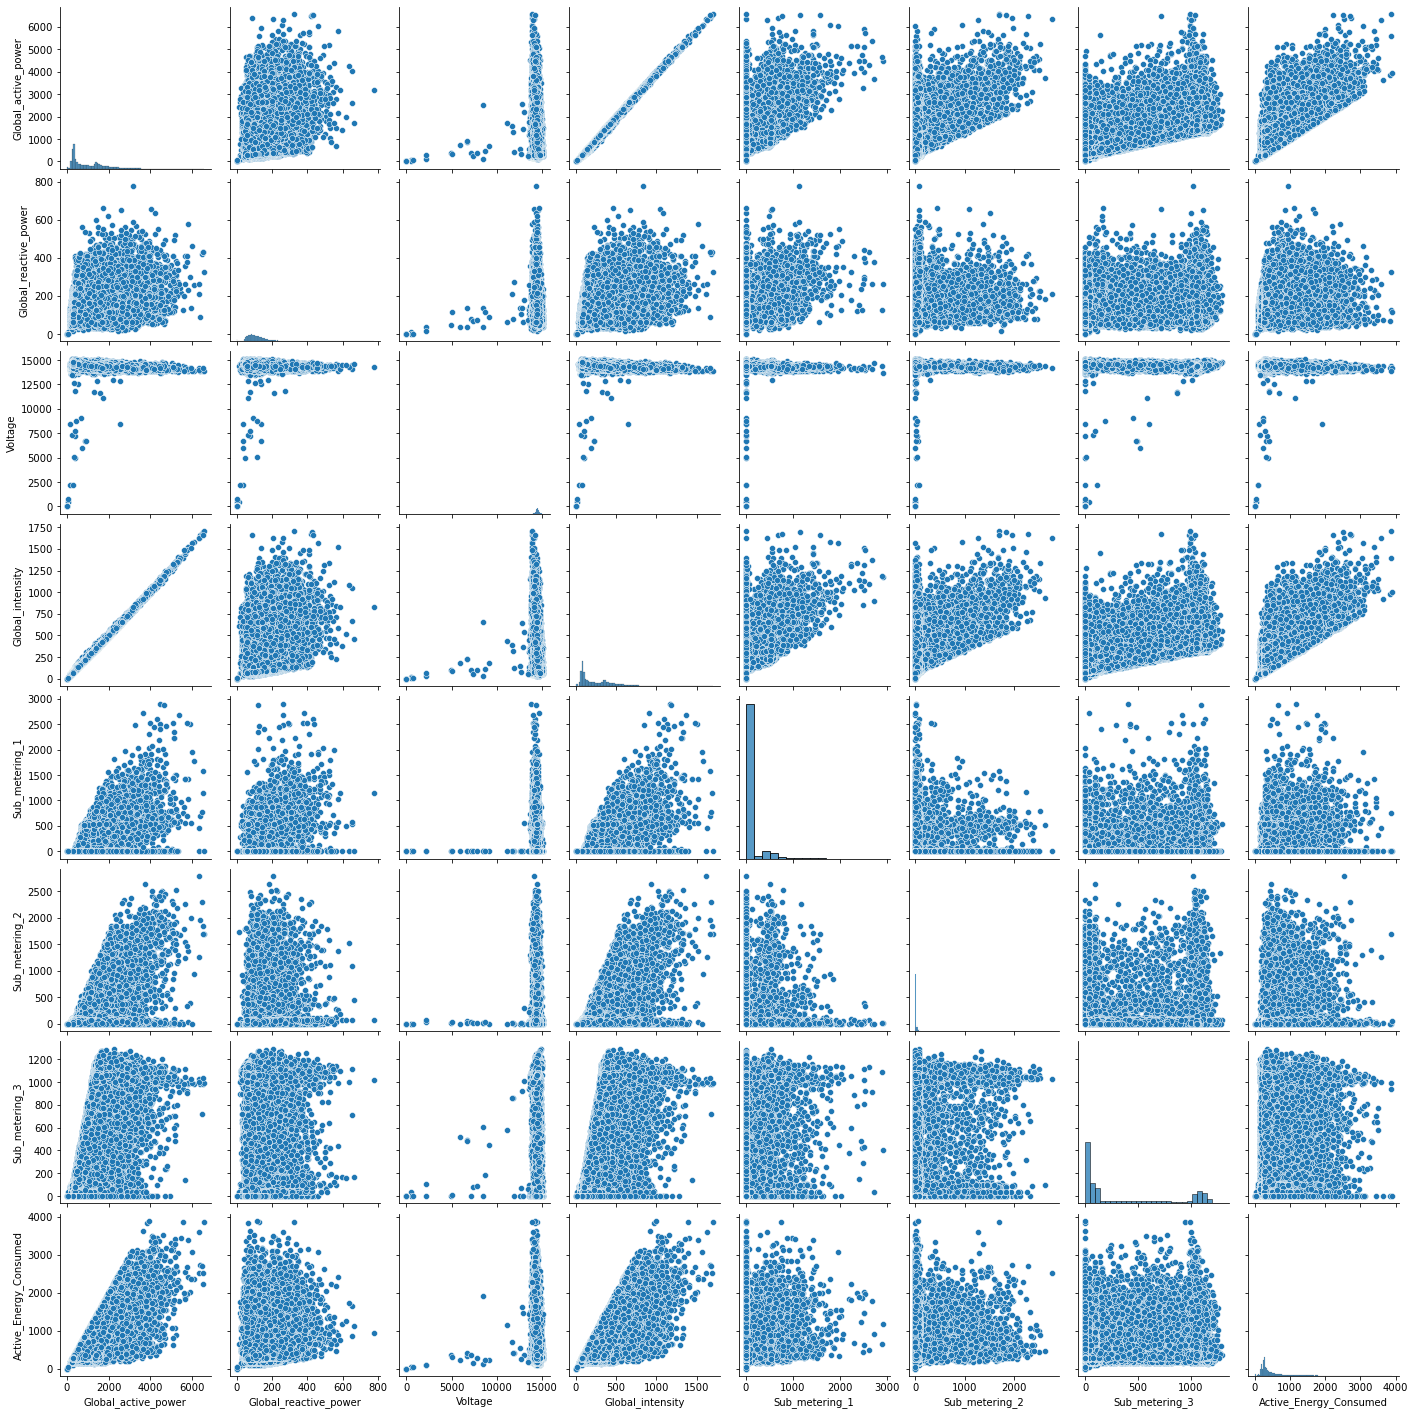

In [13]:
# bivariate analysis
sns.pairplot(power_resample_df)
plt.show()

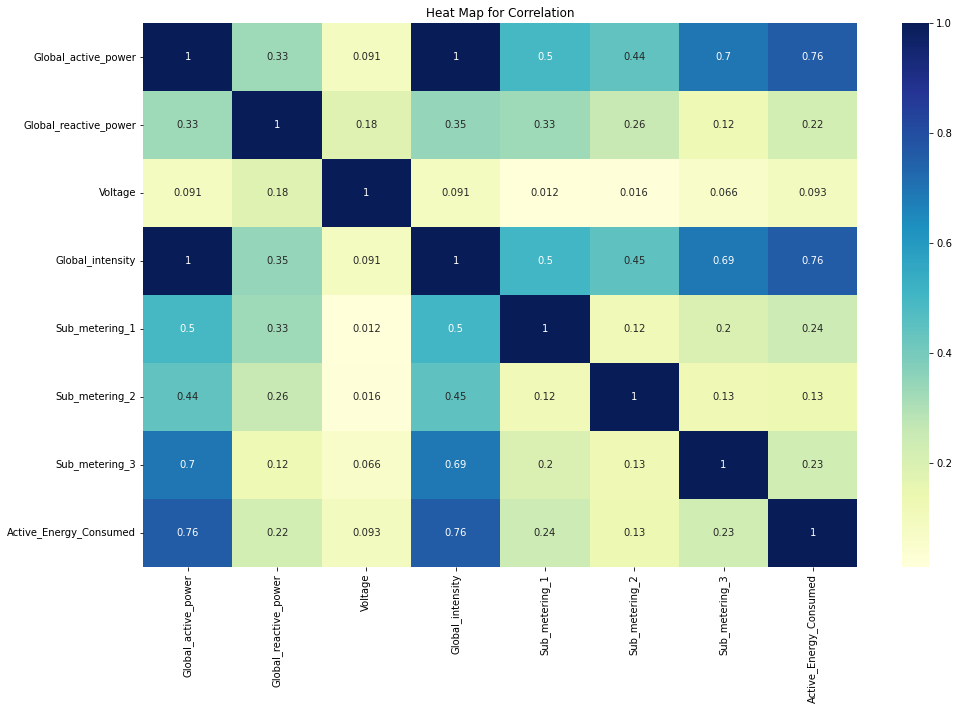

In [14]:
# correlation plot for bivariate analysis
plt.figure(figsize = (16, 10))
sns.heatmap(power_resample_df.corr(), annot = True, cmap="YlGnBu")
plt.title('Heat Map for Correlation')
plt.show()

# Global active power and Global intensity are highly correlated

### Model building and evaluation

In [15]:
# Since our objective is to reduce global reactive power, we can do clustering on
# global reactive power and active energy consumed (which is derived from global active power and sub meter readings)
# to find relation between global reactive power and active energy consumed over the given time period 
# and suggest ways to minimize global reactive power based on analysis

# Drop Global_active_power, Voltage, Global_intensity, Sub_metering_1, Sub_metering_2 and Sub_metering_3
power_resample_df_temp = power_resample_df.drop(['Global_active_power','Sub_metering_1',\
                                            'Voltage','Global_intensity',
                                            'Sub_metering_2','Sub_metering_3'], axis=1)

In [16]:
# Function to be used for Hopkins Stat
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [17]:
# Checking Hopkins Value to see if data can be used for clustering; if > 0.7 data is good for clustering
hopkins(power_resample_df_temp)

0.9800698998110012

In [18]:
# Scaling the data before model building
scaler = StandardScaler()
# scaled dataframe for model building
power_resample_df_scaled = scaler.fit_transform(power_resample_df_temp)

#### Finding Optimal Number of Clusters

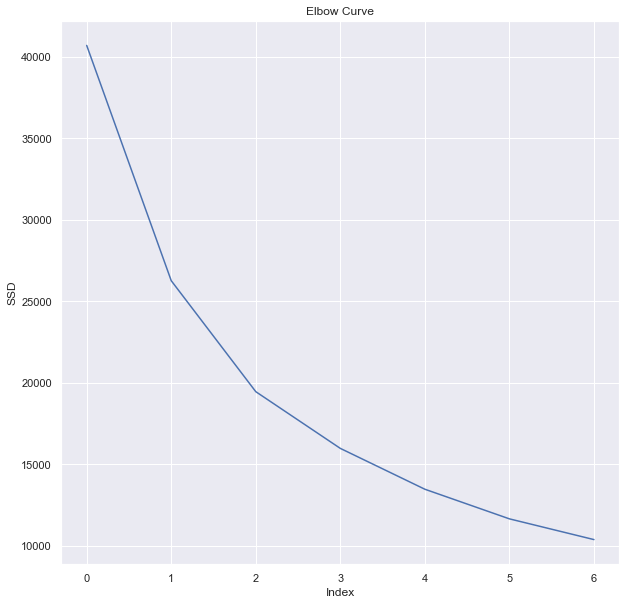

In [19]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    # Initialize KMeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=100, random_state=42)

    kmeans.fit(power_resample_df_scaled)
    ssd.append(kmeans.inertia_)

# plot the SSDs for each n_clusters
# SSD
sns.set(rc={'figure.figsize':(10, 10)})
plt.title("Elbow Curve")
plt.xlabel("Index")
plt.ylabel("SSD")
plt.plot(ssd)

# As per plot, number of cluster seems to be 2 or 3

For n_clusters=2, the silhouette score is 0.5526741936831591
For n_clusters=3, the silhouette score is 0.5440669023938236
For n_clusters=4, the silhouette score is 0.43661313178359806
For n_clusters=5, the silhouette score is 0.43977888321416614
For n_clusters=6, the silhouette score is 0.3952154119843449
For n_clusters=7, the silhouette score is 0.3971502886401508
For n_clusters=8, the silhouette score is 0.40228022909501376
For n_clusters=9, the silhouette score is 0.36993216039761895


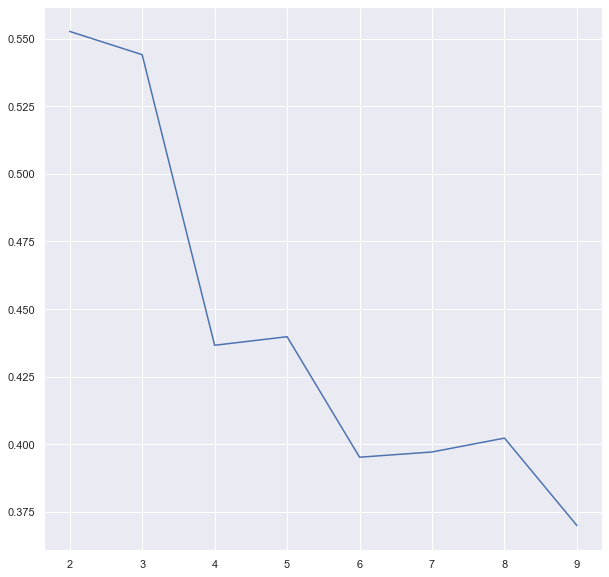

In [20]:
# Checking silhouette score to identify the ideal number of clusters
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, max_iter=100, random_state=42)
    kmeans.fit(power_resample_df_scaled)
    cluster_labels = kmeans.labels_
    
    # silhoutte score
    silhouette_avg = silhouette_score(power_resample_df_scaled, cluster_labels)
    sse_.append([k, silhouette_avg])
    print("For n_clusters={0}, the silhouette score is {1}".format(k, silhouette_avg))
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

In [21]:
#As per elbow curve & silhouette score, number of clusters seems to be 2 or 3
#For better analysis, we can take number of clusters as 3

In [22]:
# final model with k=3
kmeans = KMeans(n_clusters=3, random_state =42, max_iter=100)
kmeans.fit(power_resample_df_scaled)

KMeans(max_iter=100, n_clusters=3, random_state=42)

### Analysis of results

In [23]:
kmeans.cluster_centers_.shape

(3, 2)

In [24]:
kmeans.cluster_centers_

array([[-0.35514047, -0.40622237],
       [-0.00518572,  2.06631011],
       [ 1.79090281,  0.13825496]])

In [25]:
kmeans.labels_

array([1, 1, 1, ..., 1, 1, 0])

In [26]:
# assign the lable
power_resample_df["cluster_id"] = kmeans.labels_
power_resample_df.head()

Global_active_power  Global_reactive_power   Voltage  \
datetime                                                                    
2006-12-16 17:00:00          2533.733333             137.400000   8447.18   
2006-12-16 18:00:00          3632.200000              80.033333  14074.81   
2006-12-16 19:00:00          3400.233333              85.233333  13993.95   
2006-12-16 20:00:00          3268.566667              75.100000  14044.29   
2006-12-16 21:00:00          3056.466667              76.666667  14229.52   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
datetime                                                                
2006-12-16 17:00:00             651.6             0.0            19.0   
2006-12-16 18:00:00             936.0             0.0           403.0   
2006-12-16 19:00:00             870.2             0.0            86.0   
2006-12-16 20:00:00             835.0             0.0             0.0   
2006-12-16 21:00:00             782.8             0.0            25.0   

                     Sub_metering_3  Active_Energy_Consumed  cluster_id  
datetime                                                                 
2006-12-16 17:00:00           607.0             1907.733333           1  
2006-12-16 18:00:00          1012.0             2217.200000           1  
2006-12-16 19:00:00          1001.0             2313.233333           1  
2006-12-16 20:00:00          1007.0             2261.566667           1  
2006-12-16 21:00:00          1033.0             1998.466667           1

In [27]:
power_resample_df["cluster_id"].value_counts()

0    25003
2     4980
1     4606
Name: cluster_id, dtype: int64

#### Visualization of Clusters

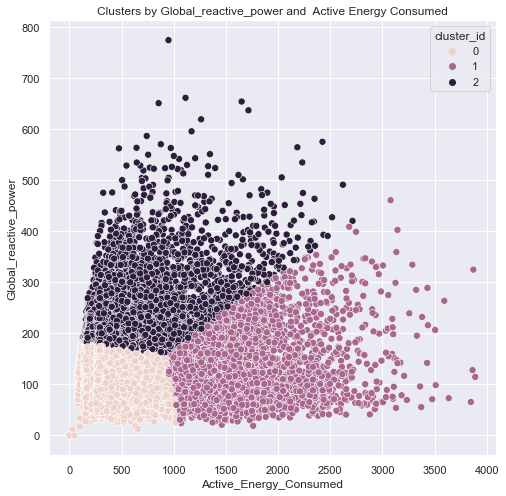

In [28]:
plt.figure(figsize =(8, 8))
sns.scatterplot(x='Active_Energy_Consumed', y='Global_reactive_power', \
                data = power_resample_df, s=50, alpha=1, hue='cluster_id')
plt.title('Clusters by Global_reactive_power and  Active Energy Consumed')
plt.show()

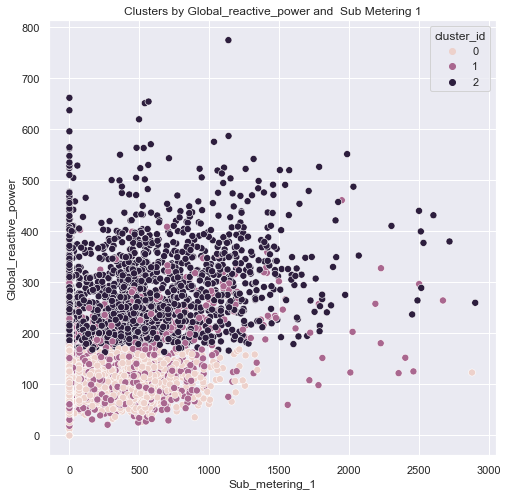

In [29]:
plt.figure(figsize =(8, 8))
sns.scatterplot(x='Sub_metering_1', y='Global_reactive_power', \
                data = power_resample_df, s=50, alpha=1, hue='cluster_id')
plt.title('Clusters by Global_reactive_power and  Sub Metering 1')
plt.show()

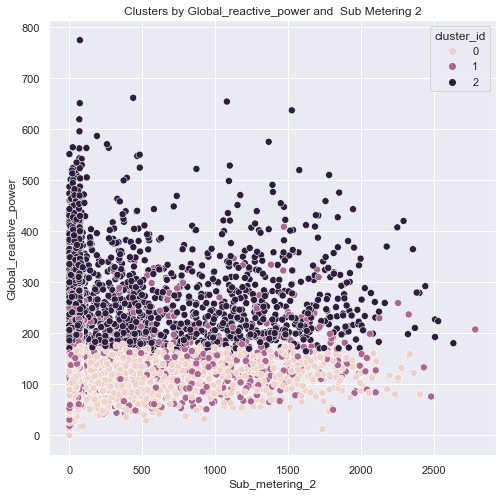

In [30]:
plt.figure(figsize =(8, 8))
sns.scatterplot(x='Sub_metering_2', y='Global_reactive_power', \
                data = power_resample_df, s=50, alpha=1, hue='cluster_id')
plt.title('Clusters by Global_reactive_power and  Sub Metering 2')
plt.show()

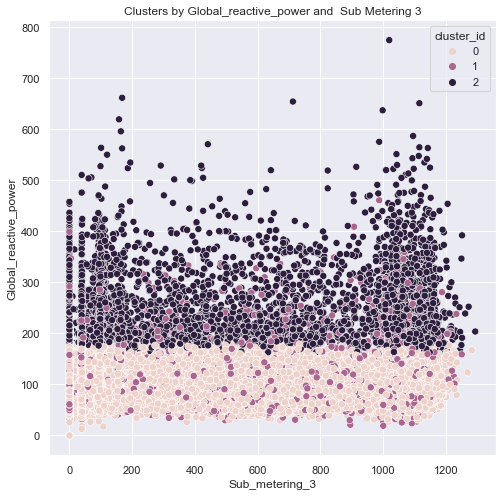

In [31]:
plt.figure(figsize =(8, 8))
sns.scatterplot(x='Sub_metering_3', y='Global_reactive_power', \
                data = power_resample_df, s=50, alpha=1, hue='cluster_id')
plt.title('Clusters by Global_reactive_power and  Sub Metering 3')
plt.show()

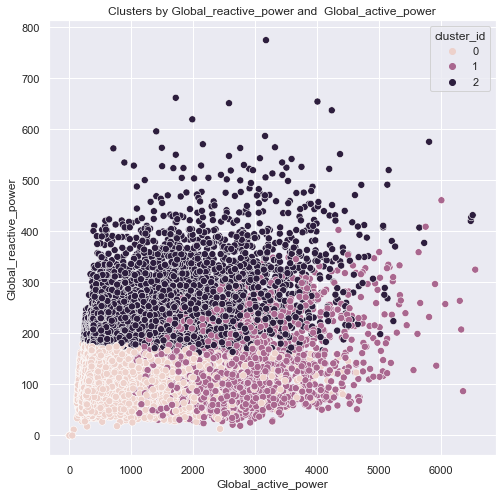

In [32]:
plt.figure(figsize =(8, 8))
sns.scatterplot(x='Global_active_power', y='Global_reactive_power', \
                data = power_resample_df, s=50, alpha=1, hue='cluster_id')
plt.title('Clusters by Global_reactive_power and  Global_active_power')
plt.show()

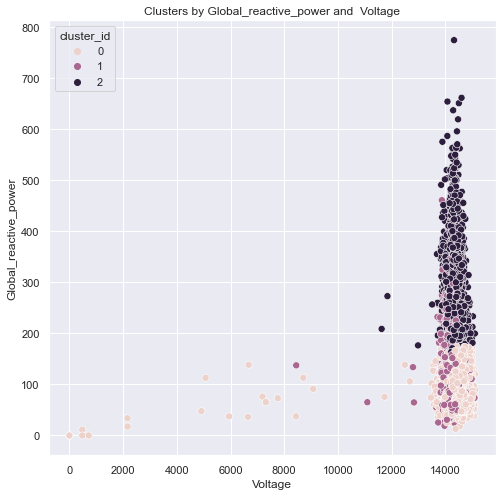

In [33]:
plt.figure(figsize =(8, 8))
sns.scatterplot(x='Voltage', y='Global_reactive_power', \
                data = power_resample_df, s=50, alpha=1, hue='cluster_id')
plt.title('Clusters by Global_reactive_power and  Voltage')
plt.show()

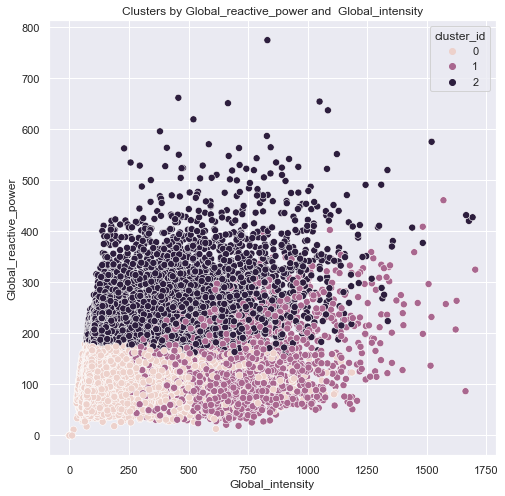

In [34]:
plt.figure(figsize =(8, 8))
sns.scatterplot(x='Global_intensity', y='Global_reactive_power', \
                data = power_resample_df, s=50, alpha=1, hue='cluster_id')
plt.title('Clusters by Global_reactive_power and  Global_intensity')
plt.show()

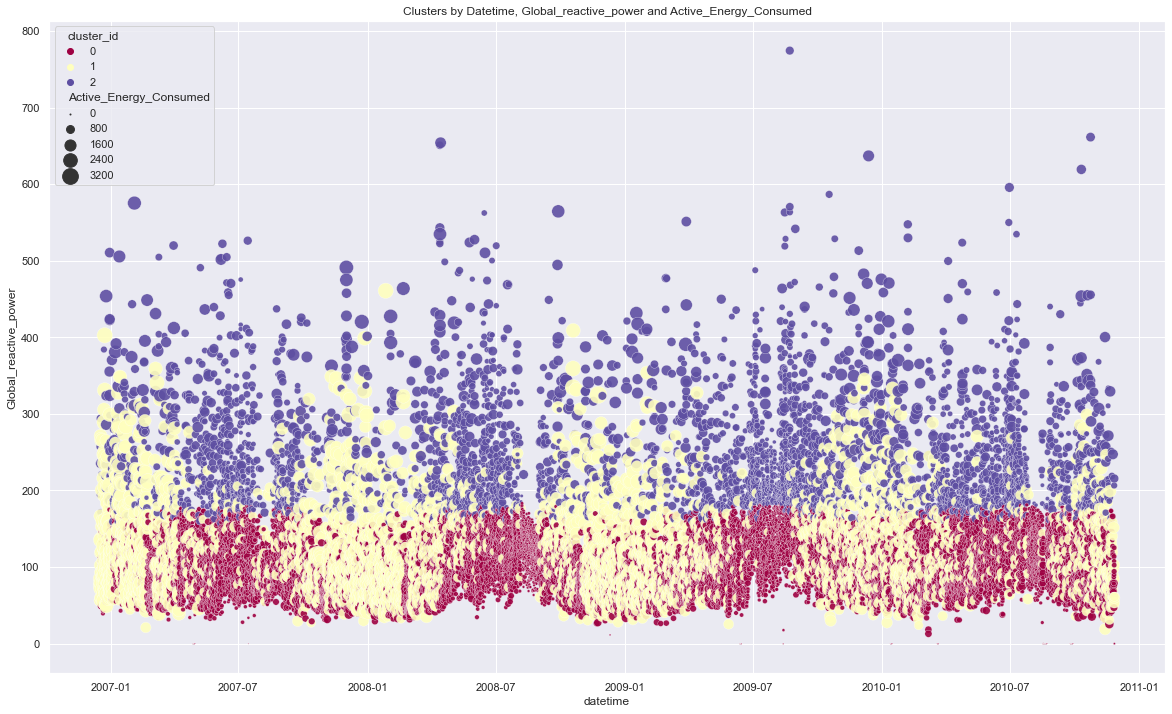

In [35]:
plt.figure(figsize =(20,12))
sns.scatterplot(x= power_resample_df.index, y='Global_reactive_power', data= power_resample_df, hue='cluster_id',\
                size ='Active_Energy_Consumed', sizes=(1, 300), alpha = .9, palette='Spectral')
plt.title('Clusters by Datetime, Global_reactive_power and Active_Energy_Consumed')
plt.show()

#### Density of Global reactive power seems high during Winter (December-February)

#### Further, Values of Global reactive power seems high for cluster with cluster_id - 2, let's see data of cluster_id -2 for further analysis

In [36]:
# data for cluster_id - 2
power_resample_df_cluster_2 = power_resample_df[power_resample_df['cluster_id']==2]

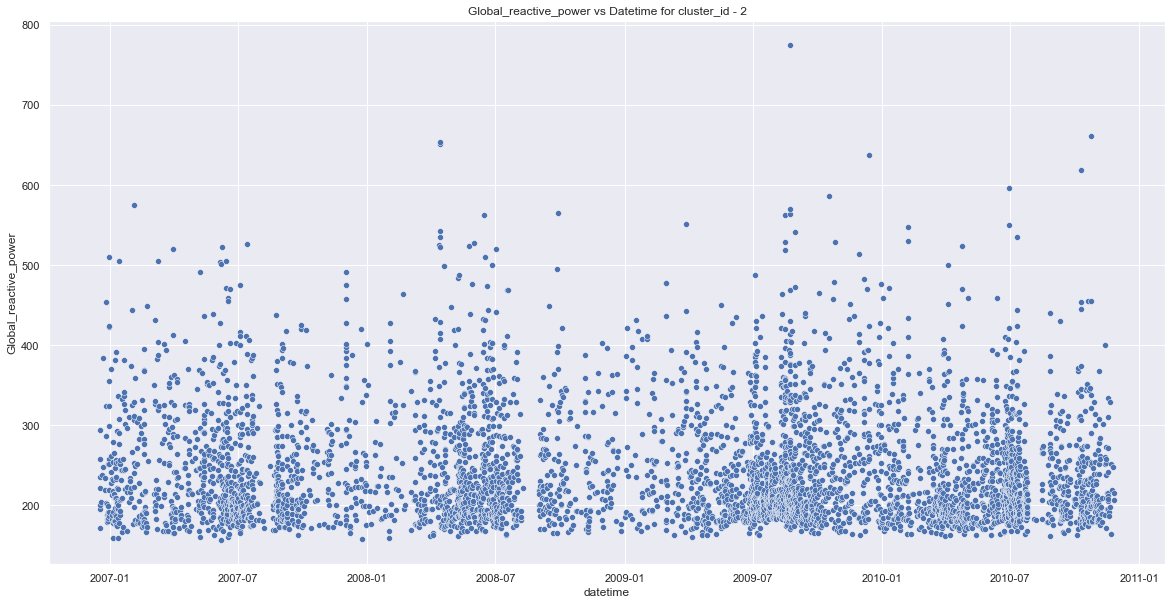

In [37]:
plt.figure(figsize =(20,10))
sns.scatterplot(x= power_resample_df_cluster_2.index, y='Global_reactive_power',\
                data= power_resample_df_cluster_2, palette='Spectral')
plt.title('Global_reactive_power vs Datetime for cluster_id - 2')
plt.show()

#### It can be seen that high density of global reactive power is during the months of June - Aug (Summer) for cluster_id - 2

### Outlier Analysis

In [38]:
# Getting dataframe of outliers on global reactive power
Q1 = power_resample_df.Global_reactive_power.quantile(0.25)
Q3 = power_resample_df.Global_reactive_power.quantile(0.75)
IQR = Q3-Q1
power_resample_df_outlier = power_resample_df[(power_resample_df.Global_reactive_power\
                                                              <= Q1-1.5*IQR) | \
                                                             (power_resample_df.Global_reactive_power\
                                                              >= Q3+1.5*IQR)]

In [39]:
power_resample_df_outlier.describe()

Global_active_power  Global_reactive_power       Voltage  \
count          1651.000000            1651.000000   1651.000000   
mean           2204.358510             326.207834  14349.054615   
std            1171.245271              64.200912    182.005659   
min             317.233333             256.233333  11844.600000   
25%            1327.500000             278.700000  14256.780000   
50%            2066.800000             309.066667  14370.060000   
75%            2932.350000             354.433333  14461.545000   
max            6560.533333             774.333333  14909.590000   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
count       1651.000000     1651.000000     1651.000000     1651.000000   
mean         567.978195      367.947910      260.921260      583.593580   
std          295.264522      506.951736      473.283184      436.807122   
min          102.600000        0.000000        0.000000        0.000000   
25%          343.900000        0.000000       24.000000      105.000000   
50%          526.200000        7.000000       53.000000      594.000000   
75%          750.600000      623.000000      173.500000     1040.000000   
max         1703.000000     2902.000000     2443.000000     1251.000000   

       Active_Energy_Consumed   cluster_id  
count             1651.000000  1651.000000  
mean               991.895760     1.917020  
std                616.443495     0.275936  
min                175.133333     1.000000  
25%                523.016667     2.000000  
50%                801.133333     2.000000  
75%               1346.916667     2.000000  
max               3872.533333     2.000000

In [40]:
power_resample_df_outlier['cluster_id'].value_counts()

2    1514
1     137
Name: cluster_id, dtype: int64

#### It can be seen that most of the outliers lie in cluster with cluster_id - 2

In [41]:
# Getting outliers with cluster_id - 2 for further analysis
power_resample_df_outlier2 = power_resample_df_outlier[power_resample_df_outlier['cluster_id']==2]

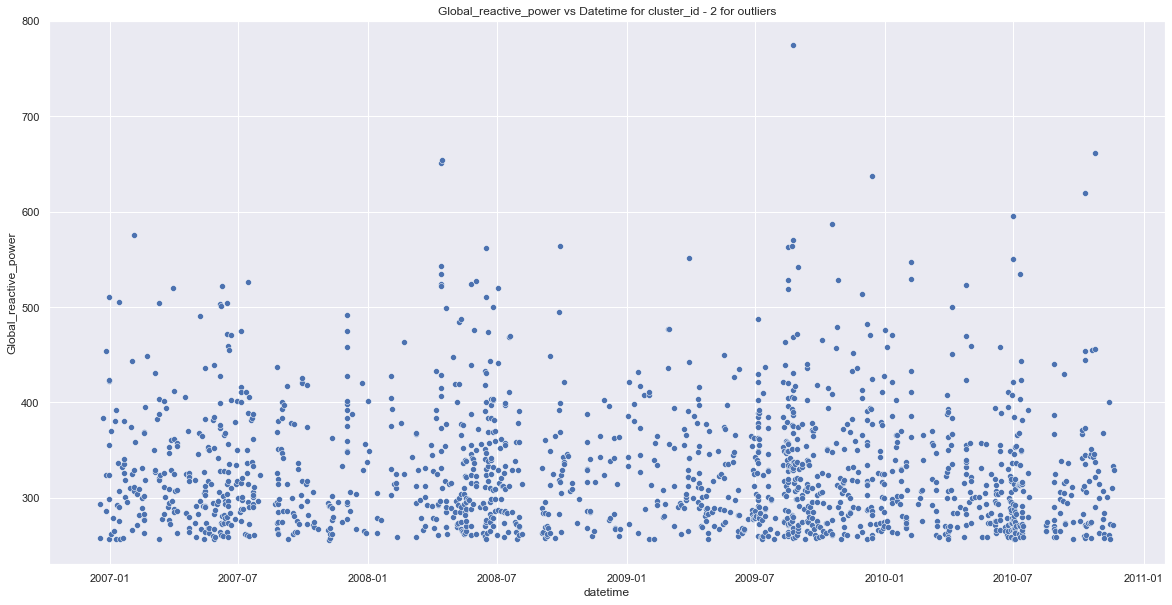

In [42]:
plt.figure(figsize =(20,10))
sns.scatterplot(x= power_resample_df_outlier2.index, y='Global_reactive_power',\
                data= power_resample_df_outlier2, palette='Spectral')
plt.title('Global_reactive_power vs Datetime for cluster_id - 2 for outliers')
plt.show()

#### It can be seen that most of the outliers are in the months of June - Aug (Summer)

## Final Recommendation - 
## 1. Data in cluster_id - 1 & 2 can be seen for reducing high values of global reactive power
## 2. Data in cluster_id - 0 & 1 can be seen for reducing high density of global reactive power during Dec-Feb (Winter)